# CRIPTOMONEDA
Una **criptomoneda** es una forma de dinero digital o virtual que utiliza criptografía para asegurar las transacciones y controlar la creación de nuevas unidades. A diferencia de las monedas tradicionales, las criptomonedas operan en una red descentralizada basada en la tecnología blockchain



<div style="text-align: center;">
  <img src="https://s2.coinmarketcap.com/static/img/coins/200x200/1.png" alt="BIT COIN">
</div>



# Análisis del Mercado de Criptomonedas
**Objetivos**

- Obtener datos en tiempo real sobre precios de criptomonedas, capitalización de mercado, volumen de comercio, y otras métricas relevantes.

In [34]:
import requests

def obtener_datos_completos_bitcoin():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'ids': 'bitcoin'
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data:
            bitcoin_data = data[0]
            precio = bitcoin_data['current_price']
            market_cap = bitcoin_data['market_cap']
            volumen_comercio = bitcoin_data['total_volume']
            maximo_24h = bitcoin_data['high_24h']
            minimo_24h = bitcoin_data['low_24h']
            cambio_porcentual_24h = bitcoin_data['price_change_percentage_24h']

            print(f'Precio actual de Bitcoin (USD): {precio}')
            print(f'Capitalización de mercado de Bitcoin (USD): {market_cap}')
            print(f'Volumen de comercio en 24h (USD): {volumen_comercio}')
            print(f'Máximo en 24h (USD): {maximo_24h}')
            print(f'Mínimo en 24h (USD): {minimo_24h}')
            print(f'Cambio porcentual en 24h: {cambio_porcentual_24h}%')
        else:
            print('No se pudo obtener los datos de Bitcoin.')
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
    except ValueError:
        print('Error al analizar la respuesta JSON.')

if __name__ == '__main__':
    obtener_datos_completos_bitcoin()


Precio actual de Bitcoin (USD): 57248
Capitalización de mercado de Bitcoin (USD): 1128271487257
Volumen de comercio en 24h (USD): 19317154475
Máximo en 24h (USD): 57833
Mínimo en 24h (USD): 55140
Cambio porcentual en 24h: 0.32826%


. Recopilar datos históricos para analizar tendencias y patrones en el mercado de criptomonedas.

Datos históricos de Bitcoin:
     timestamp         price
0   2024-06-29  60922.084110
1   2024-06-30  61401.992271
2   2024-07-01  63069.503840
3   2024-07-02  62478.677555
4   2024-07-03  60558.732426
5   2024-07-04  58325.957306
6   2024-07-05  55743.558473
7   2024-07-06  57027.000217
8   2024-07-07  57425.064368
9   2024-07-08  56195.935057
10  2024-07-09  57184.455566


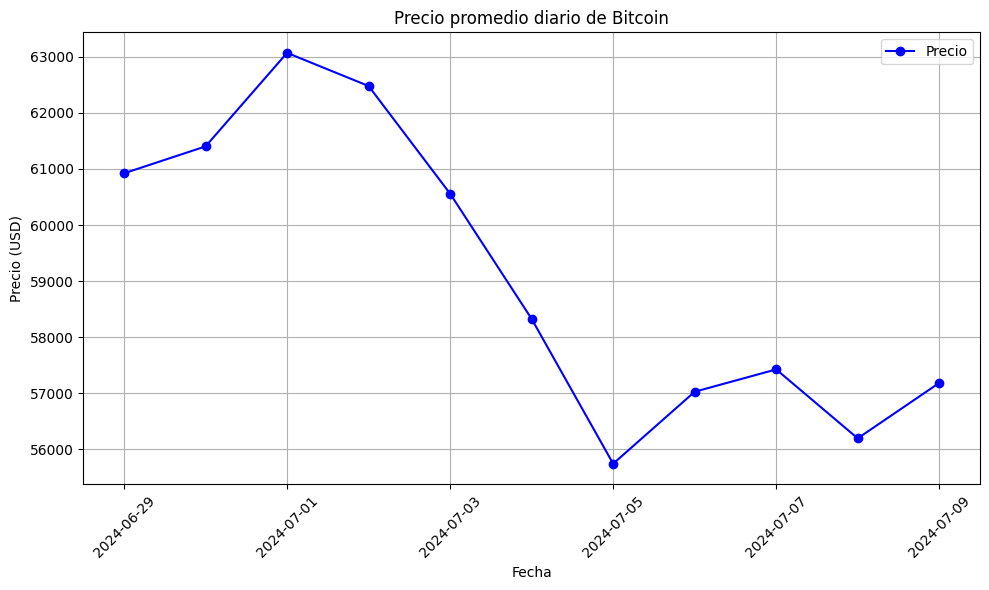

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def obtener_datos_historicos(symbol, days):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    
    # URL de la API 
    url = 'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': int(start_date.timestamp()),
        'to': int(end_date.timestamp())
    }
    
    try:
       
        response = requests.get(url.format(symbol=symbol), params=params)
        response.raise_for_status()
        data = response.json()
        
        df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        
        # Convertir la columna de timestamp a datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        
        # Redondear la columna de timestamp a la fecha por día
        df['timestamp'] = df['timestamp'].dt.date
        
        # Agrupar por fecha y obtener el precio promedio diario de Bitcoin
        df = df.groupby('timestamp', as_index=False)['price'].mean()
        
        # Guardar los datos en un archivo CSV
        csv_filename = f'{symbol}_historical_data.csv'
        df.to_csv(csv_filename, index=False)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
        return None
    except ValueError:
        print('Error al analizar la respuesta JSON.')
        return None

def graficar_datos(df):
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['price'], marker='o', linestyle='-', color='b', label='Precio')
    plt.title('Precio promedio diario de Bitcoin')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Obtener datos históricos de Bitcoin 
    symbol = 'bitcoin'
    days = 10
    df_bitcoin = obtener_datos_historicos(symbol, days)
    
    if df_bitcoin is not None:
        print('Datos históricos de Bitcoin:')
        print(df_bitcoin)
        
        # Graficar los datos
        graficar_datos(df_bitcoin)
    else:
        print('No se pudieron obtener los datos históricos de Bitcoin.')



**Objetivos**

Realizar un análisis exploratorio para identificar tendencias, correlaciones y patrones.

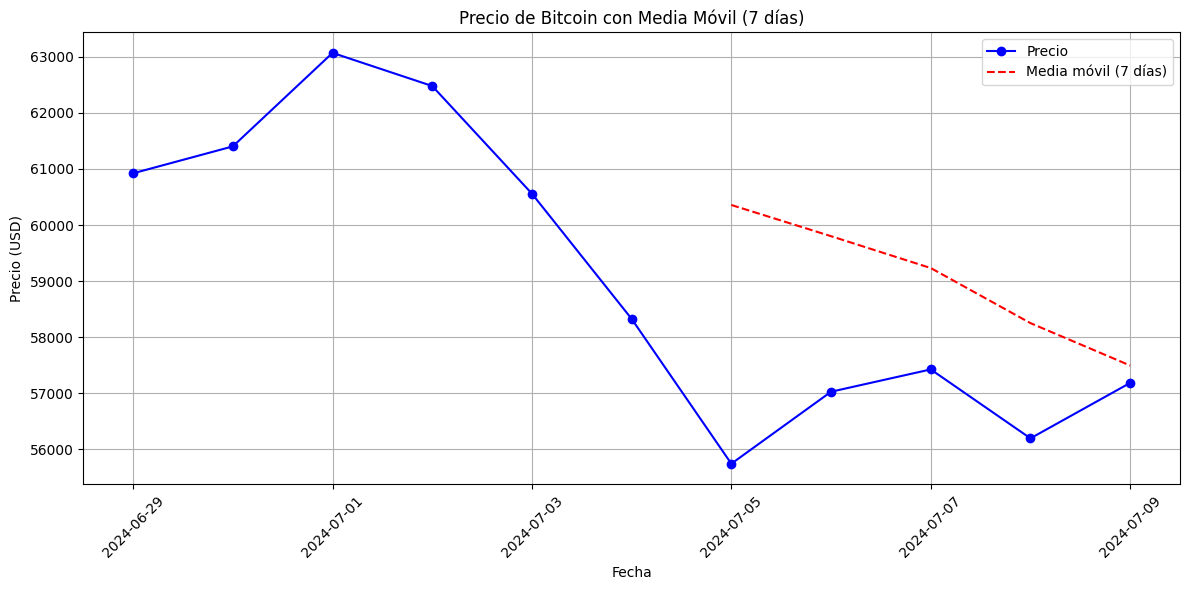

In [36]:
# Calcular la media móvil de 7 días para suavizar los datos
df_bitcoin['rolling_mean'] = df_bitcoin['price'].rolling(window=7).mean()

# Graficar el precio de Bitcoin con la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin['timestamp'], df_bitcoin['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.plot(df_bitcoin['timestamp'], df_bitcoin['rolling_mean'], linestyle='--', color='r', label='Media móvil (7 días)')
plt.title('Precio de Bitcoin con Media Móvil (7 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

. Utilizar técnicas de análisis predictivo para prever posibles movimientos en el mercado.


In [37]:
stats = df_bitcoin['price'].describe()
df_stats = pd.DataFrame({
    'Estadística': stats.index,
    'Valor': stats.values
})

print(df_stats)
csv_filename = 'bitcoin_price_stats.csv'
df_stats.to_csv(csv_filename, index=False)


  Estadística         Valor
0       count     11.000000
1        mean  59121.178290
2         std   2626.500166
3         min  55743.558473
4         25%  57105.727892
5         50%  58325.957306
6         75%  61162.038191
7         max  63069.503840


. Crear visualizaciones interactivas para explorar los datos de las criptomonedas de manera intuitiva.

C:\Users\alvar\AppData\Local\Temp\ipykernel_27224\3484599140.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end_date = datetime.utcnow()


Datos históricos de Bitcoin:
                                price
timestamp                            
2024-04-10 20:00:50.250  70003.249703
2024-04-10 21:03:29.163  69767.316679
2024-04-10 22:04:55.650  70045.761194
2024-04-10 23:07:57.374  70587.450745
2024-04-11 00:03:11.094  70602.353570


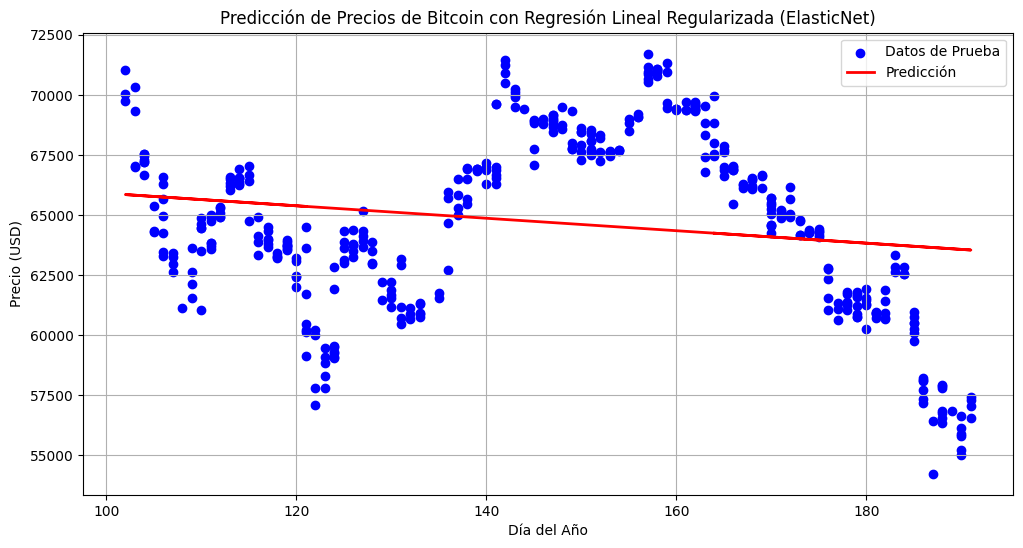

Mean Squared Error (MSE): 13308741.982113887
R^2 Score: 0.032022667177425745


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import requests

# Función para obtener datos históricos de Bitcoin
def obtener_datos_historicos(symbol, days):
    end_date = datetime.utcnow()
    start_date = end_date - timedelta(days=days)
    
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': int(start_date.timestamp()),
        'to': int(end_date.timestamp())
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Procesar datos en un DataFrame de pandas
        df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f'Error al obtener datos: {e}')
        return None
    except ValueError as ve:
        print(f'Error al procesar JSON: {ve}')
        return None

# Obtener datos históricos de Bitcoin para los últimos 90 días
df_bitcoin = obtener_datos_historicos('bitcoin', 90)

# Verificar y visualizar los datos obtenidos
if df_bitcoin is not None:
    print('Datos históricos de Bitcoin:')
    print(df_bitcoin.head())

    # Preparar datos para la regresión lineal
    df_bitcoin['fecha'] = df_bitcoin.index.date  # Agregar columna de fecha
    df_bitcoin['fecha'] = pd.to_datetime(df_bitcoin['fecha'])  # Convertir a tipo datetime
    df_bitcoin['dia'] = df_bitcoin['fecha'].dt.dayofyear  # Obtener el día del año como característica
    X = df_bitcoin[['dia']].values  # Característica: día del año
    y = df_bitcoin['price'].values  # Variable objetivo: precio de Bitcoin

    # Dividir datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Lineal con ElasticNet
    model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    model.fit(X_train, y_train)

    # Predecir los precios de Bitcoin usando el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualizar resultados
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
    plt.title('Predicción de Precios de Bitcoin con Regresión Lineal Regularizada (ElasticNet)')
    plt.xlabel('Día del Año')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimir métricas de evaluación
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R^2 Score: {r2}')

else:
    print('No se pudieron obtener los datos históricos de Bitcoin.')


